# ComCamSim 2024 April Ops Rehearsal 3 - DIA
Author: Michael Wood-Vasey <wmwv@pitt.edu>
Last Verified to Run: 2024-04-15

Let's look at how the DIA did for the April Ops Rehearsal 3.
For some context details, see

https://confluence.lsstcorp.org/display/DM/Prompt+Processing+with+LSSTComCamSim+ops-rehearsal-3

And read Meredith Rawl's notebook at  
https://nbviewer.org/github/lsst-dm/vv-team-notebooks/blob/fab304924fd036c479fc4f61269a2041c287d146/notebooks/PREOPS-5029-DiaReasonable.ipynb

Here, I'm mostly trying to get started

1. [ ] Look at basic statistics of processing
2. [ ] Identify one calexp DIA to explore
3. [ ] Read catalog and get DiaSrc
4. [ ] Look at postage stamps, including mask plane, for 1, 10, 100 candidates

Maybe later:  
* [ ] Understand what we get from DRP vs. APDB

Run at RSP on USDF.  Run using `w_2024_15`.  I don't know what the minimum number needs to be.  In particular, the current "Recommend Weekly" is `w_2024_4`; I don't know if this is sufficient.


was helpful in getting started.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from lsst.daf.butler import Butler

In [3]:
from astropy.visualization import ZScaleInterval, SqrtStretch, ImageNormalize, MinMaxInterval, LogStretch
from astropy.table import Table, join
import lsst.daf.butler as dafButler
from lsst.daf.butler import DatasetNotFoundError
from lsst.pipe.base import Instrument
from lsst.ap.association.transformDiaSourceCatalog import UnpackApdbFlags
import lsst.afw.display as afwDisplay
import lsst.display.astrowidgets
afwDisplay.setDefaultBackend('astrowidgets')

Key orientation information: repo, collection, dataset types.

In [6]:
repo = "/repo/embargo"
# There were three nights for the Ops Rehearsal.
# Prompt Procesing for 2024-04-02 and 2024-04-03 did not yield good results so
# we focus on 2024-04-04.
collection = "LSSTComCamSim/prompt/output-2024-04-04"
instrument = "LSSTComCamSim"

collections = [collection, "LSSTComCamSim/templates", "LSSTComCamSim/defaults"]

Dataset Types we'll be interested in  
`postISRCCD`  (I don't think there's a "calexp" in prompt processing)  
`goodSeeingDiff_differenceExp`  
`goodSeeingDiff_diaSrc`  (or goodSeeingDiff_diaSrcTable depending on the schema you want.)

In [7]:
butler = Butler(repo, collections=collections, instrument=instrument)

In [8]:
registry = butler.registry
for ref in registry.queryDatasets('raw'):
    print(ref.dataId.full)

/tmp/ipykernel_1906/2321921745.py:3: FutureWarning: Call to deprecated function (or staticmethod) full. (DataCoordinate.full is deprecated in favor of .mapping, and will be dropped after v27.) -- Deprecated since version v27.
  print(ref.dataId.full)


{instrument: 'LSSTComCamSim', detector: 8, exposure: 7024022200001, band: 'unknown', physical_filter: 'unknown'}
{instrument: 'LSSTComCamSim', detector: 1, exposure: 7024022200001, band: 'unknown', physical_filter: 'unknown'}
{instrument: 'LSSTComCamSim', detector: 4, exposure: 7024022200001, band: 'unknown', physical_filter: 'unknown'}
{instrument: 'LSSTComCamSim', detector: 2, exposure: 7024022200001, band: 'unknown', physical_filter: 'unknown'}
{instrument: 'LSSTComCamSim', detector: 6, exposure: 7024022200001, band: 'unknown', physical_filter: 'unknown'}
{instrument: 'LSSTComCamSim', detector: 0, exposure: 7024022200001, band: 'unknown', physical_filter: 'unknown'}
{instrument: 'LSSTComCamSim', detector: 5, exposure: 7024022200001, band: 'unknown', physical_filter: 'unknown'}
{instrument: 'LSSTComCamSim', detector: 7, exposure: 7024022200001, band: 'unknown', physical_filter: 'unknown'}
{instrument: 'LSSTComCamSim', detector: 3, exposure: 7024022200001, band: 'unknown', physical_fi

In [9]:
registry = butler.registry
for ref in registry.queryDatasets('postISRCCD'):
    print(ref.dataId.full)

/tmp/ipykernel_1906/1382294188.py:3: FutureWarning: Call to deprecated function (or staticmethod) full. (DataCoordinate.full is deprecated in favor of .mapping, and will be dropped after v27.) -- Deprecated since version v27.
  print(ref.dataId.full)


{instrument: 'LSSTComCamSim', detector: 0, exposure: 7024040400021, band: 'g', physical_filter: 'g_01'}
{instrument: 'LSSTComCamSim', detector: 1, exposure: 7024040400030, band: 'g', physical_filter: 'g_01'}
{instrument: 'LSSTComCamSim', detector: 0, exposure: 7024040400030, band: 'g', physical_filter: 'g_01'}
{instrument: 'LSSTComCamSim', detector: 8, exposure: 7024040400024, band: 'g', physical_filter: 'g_01'}
{instrument: 'LSSTComCamSim', detector: 8, exposure: 7024040400027, band: 'g', physical_filter: 'g_01'}
{instrument: 'LSSTComCamSim', detector: 1, exposure: 7024040400020, band: 'r', physical_filter: 'r_03'}
{instrument: 'LSSTComCamSim', detector: 8, exposure: 7024040400019, band: 'r', physical_filter: 'r_03'}
{instrument: 'LSSTComCamSim', detector: 5, exposure: 7024040400026, band: 'g', physical_filter: 'g_01'}
{instrument: 'LSSTComCamSim', detector: 0, exposure: 7024040400029, band: 'g', physical_filter: 'g_01'}
{instrument: 'LSSTComCamSim', detector: 5, exposure: 70240404000

In [10]:
registry = butler.registry
for ref in registry.queryDatasets('goodSeeingDiff_differenceExp'):
    print(ref.dataId.full)

/tmp/ipykernel_1906/3102243970.py:3: FutureWarning: Call to deprecated function (or staticmethod) full. (DataCoordinate.full is deprecated in favor of .mapping, and will be dropped after v27.) -- Deprecated since version v27.
  print(ref.dataId.full)


{instrument: 'LSSTComCamSim', detector: 0, visit: 7024040400021, band: 'g', physical_filter: 'g_01'}
{instrument: 'LSSTComCamSim', detector: 1, visit: 7024040400030, band: 'g', physical_filter: 'g_01'}
{instrument: 'LSSTComCamSim', detector: 8, visit: 7024040400024, band: 'g', physical_filter: 'g_01'}
{instrument: 'LSSTComCamSim', detector: 2, visit: 7024040400023, band: 'g', physical_filter: 'g_01'}
{instrument: 'LSSTComCamSim', detector: 0, visit: 7024040400030, band: 'g', physical_filter: 'g_01'}
{instrument: 'LSSTComCamSim', detector: 5, visit: 7024040400029, band: 'g', physical_filter: 'g_01'}
{instrument: 'LSSTComCamSim', detector: 8, visit: 7024040400028, band: 'g', physical_filter: 'g_01'}
{instrument: 'LSSTComCamSim', detector: 1, visit: 7024040400027, band: 'g', physical_filter: 'g_01'}
{instrument: 'LSSTComCamSim', detector: 1, visit: 7024040400020, band: 'r', physical_filter: 'r_03'}
{instrument: 'LSSTComCamSim', detector: 1, visit: 7024040400028, band: 'g', physical_filter

In [16]:
data_id = {"detector": 0, "exposure": 7024040400021}

raw = butler.get("raw", dataId=data_id)
post_isr_ccd = butler.get("postISRCCD", dataId=data_id)

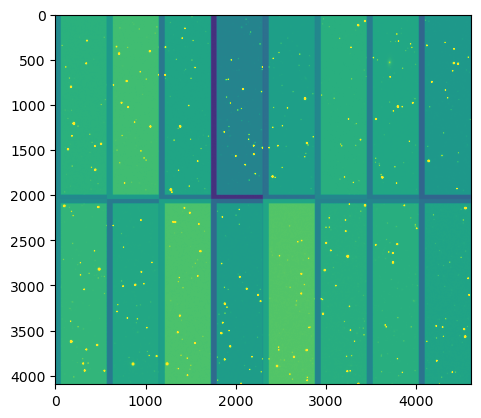

In [17]:
norm = ImageNormalize(raw.image.array, interval=ZScaleInterval(), stretch=SqrtStretch())
plt.imshow(raw.image.array, norm=norm)
plt.show()

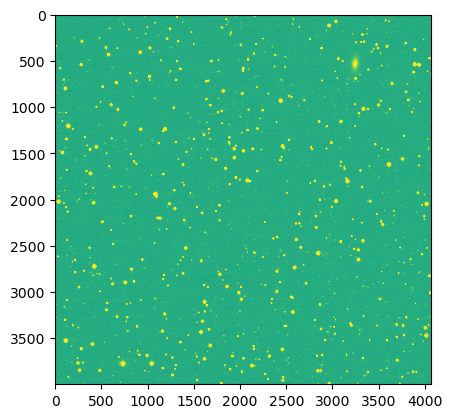

In [18]:
norm = ImageNormalize(post_isr_ccd.image.array, interval=ZScaleInterval(), stretch=SqrtStretch())
plt.imshow(post_isr_ccd.image.array, norm=norm)
plt.show()

In [19]:
# Now we have to rename "exposure" -> "visit"?  Why?  This is confusing
data_id["visit"] = data_id["exposure"]

diff_exp = butler.get("goodSeeingDiff_differenceExp", dataId=data_id)
# dia_src = butler.get("goodSeeingDiff_diaSrc", dataId=data_id)

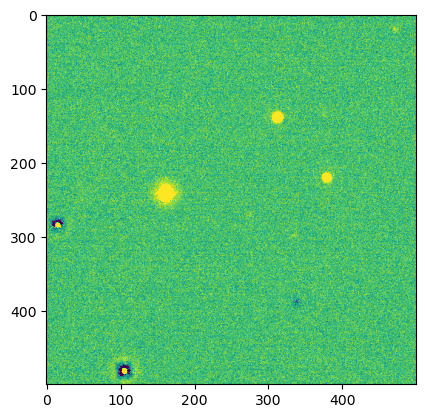

In [22]:
small = diff_exp.image.array[500:1000,500:1000]
norm = ImageNormalize(small, interval=ZScaleInterval(), stretch=SqrtStretch())
plt.imshow(small, norm=norm)
plt.show()

Hmmm... how do we figure out which data IDs did get processed through to DIA?

In [ ]:
# These are the runs that this chained collection is derived from
butler.registry.queryCollections(collection, flattenChains=True)

In [28]:
# Pipeline graph : https://tigress-web.princeton.edu/~lkelvin/pipelines/current/ap_pipe/LSSTComCamSim/ApPipe/pipeline_ap_pipe_LSSTComCamSim_ApPipe.pdf 
cat = butler.get("goodSeeingDiff_diaSrc", dataId=data_id )
filtered_transformed_cat = butler.get("goodSeeingDiff_diaSrcTable", dataId=data_id )

In [31]:
print( type(filtered_transformed_cat) )
display( filtered_transformed_cat )

<class 'pandas.core.frame.DataFrame'>


diaSourceId    ccdVisitId band  diaObjectId  ssObjectId  \
0    3065508809532243976  730874254592    g            0           0   
1    3065508809532243978  730874254592    g            0           0   
2    3065508809532243980  730874254592    g            0           0   
3    3065508809532243986  730874254592    g            0           0   
4    3065508809532243995  730874254592    g            0           0   
..                   ...           ...  ...          ...         ...   
171  3065508809532244254  730874254592    g            0           0   
172  3065508809532244255  730874254592    g            0           0   
173  3065508809532244257  730874254592    g            0           0   
174  3065508809532244259  730874254592    g            0           0   
175  3065508809532244260  730874254592    g            0           0   

     parentDiaSourceId  midpointMjdTai  bboxSize             time_processed  \
0                    0    60404.990944        20 2024-04-04 23:59:02.542272   
1                    0    60404.990944        20 2024-04-04 23:59:02.542272   
2                    0    60404.990944        24 2024-04-04 23:59:02.542272   
3                    0    60404.990944        20 2024-04-04 23:59:02.542272   
4                    0    60404.990944        24 2024-04-04 23:59:02.542272   
..                 ...             ...       ...                        ...   
171                  0    60404.990944        88 2024-04-04 23:59:02.542272   
172                  0    60404.990944        22 2024-04-04 23:59:02.542272   
173                  0    60404.990944        56 2024-04-04 23:59:02.542272   
174                  0    60404.990944        62 2024-04-04 23:59:02.542272   
175                  0    60404.990944        55 2024-04-04 23:59:02.542272   

         flags  ...  dipoleNdata    scienceFlux  scienceFluxErr       ixx  \
0      9605120  ...            0  111215.790723      386.834204  0.046562   
1    134217728  ...            0    1060.557181      228.755386  0.236288   
2      9605120  ...            0   37091.225882      249.761468       NaN   
3            0  ...            0   19287.139442      251.959632  0.107402   
4            0  ...            0   68133.907562      329.737075  0.080431   
..         ...  ...          ...            ...             ...       ...   
171  142606336  ...            0   10647.569193      194.208339       NaN   
172          0  ...            0    2408.433627      205.317025  0.156762   
173  142610432  ...         6201  180370.480747      393.884634       NaN   
174  142610432  ...        10797  514501.290937      625.371116       NaN   
175       4096  ...         6996  329638.288318      541.933115  0.050632   

          iyy       ixy    ixxPSF    iyyPSF    ixyPSF  reliability  
0    0.084568  0.023548  0.292133 -0.003640 -0.003640          NaN  
1    0.404650  0.024458  0.292131 -0.003640 -0.003640          NaN  
2         NaN       NaN  0.292151 -0.003640 -0.003640          NaN  
3    0.163788  0.073963  0.292119 -0.003640 -0.003640          NaN  
4    0.096087 -0.001557  0.292121 -0.003640 -0.003640          NaN  
..        ...       ...       ...       ...       ...          ...  
171       NaN       NaN  0.292193 -0.003641 -0.003641          NaN  
172  0.354761  0.084694  0.292189 -0.003641 -0.003641          NaN  
173       NaN       NaN  0.292186 -0.003641 -0.003641          NaN  
174       NaN       NaN  0.292196 -0.003641 -0.003641          NaN  
175  0.072547 -0.031738  0.292198 -0.003641 -0.003641          NaN  

[176 rows x 49 columns]

In [32]:
filtered_transformed_cat.columns

Index(['diaSourceId', 'ccdVisitId', 'band', 'diaObjectId', 'ssObjectId',
       'parentDiaSourceId', 'midpointMjdTai', 'bboxSize', 'time_processed',
       'flags', 'ra', 'dec', 'raErr', 'decErr', 'ra_dec_Cov', 'x', 'y', 'xErr',
       'yErr', 'apFlux', 'apFluxErr', 'snr', 'psfFlux', 'psfFluxErr',
       'psfChi2', 'psfNdata', 'trailFlux', 'trailRa', 'trailDec',
       'trailLength', 'trailAngle', 'dipoleMeanFlux', 'dipoleMeanFluxErr',
       'dipoleFluxDiff', 'dipoleFluxDiffErr', 'dipoleLength', 'dipoleAngle',
       'dipoleChi2', 'isDipole', 'dipoleNdata', 'scienceFlux',
       'scienceFluxErr', 'ixx', 'iyy', 'ixy', 'ixxPSF', 'iyyPSF', 'ixyPSF',
       'reliability'],
      dtype='object')

In [34]:
print( len(filtered_transformed_cat))
print( filtered_transformed_cat.isDipole.sum() )

176
78


In [35]:
import lsst.afw.display
display = lsst.afw.display.Display(backend='firefly') 

In [38]:
display.image(post_isr_ccdtransformDiaSrcCat)
display.centroids(cat, size=10, ctype='red') 

In [ ]:
transformDiaSrcCat